__Bär Halberkamp (10758380) & Steven Raaijmakers (10804242)__

### Background:

This practical assignment will be covering logistic regression, neural networks, support vector machines and evaluation of classifiers. 

For the assignment, please download a dataset on Load Defaults. You are provided with two datasets:
1. [Dataset](https://drive.google.com/open?id=0B-zklbckv9CHNmdDY2E0NEk1a2s) with 10,000 instances 
2. [Dataset](https://drive.google.com/open?id=0B-zklbckv9CHa0xRcjExNzdrT3c) with 100,000 instances

This data corresponds to a set of financial transactions associated with individuals. The data has been standardized, de-trended, and anonymized. You are provided with thousands of observations and nearly 800 features. Each observation (instance) is independent from the previous. 

For each observation, it was recorded whether a default was triggered. In case of a default, the loss was measured. This quantity lies between 0 and 100. It has been normalised, considering that the notional of each transaction at inception is 100. For example, a loss of 60 means that only 40 is reimbursed. If the loan did not default, the loss was 0. You are asked to predict the losses for each observation in the test set.

Missing feature values have been kept as is, so that the competing teams can really use the maximum data available, implementing a strategy to fill the gaps if desired. Consider all variables continuous, even though some variables may be categorical (e.g. f776 and f777).

The goal of the data mining algorithm will be to predict whether a loan will default, given a set of features. For privacy reasons the feature names are not provided.

**Important Note**: This second assignment is not as instructive as the first assignment. The first assignment guided you step-by-step through all the preprocessing, training-validation-testing setup, etc. This assignment does not do so, but it leaves it up to you to decide how to use the data and design your experiments.

### Part 1: Import the data

In [21]:
import pandas as pd
df = pd.read_csv('loan_default_10K.csv', sep=",", header = 0)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (135,417) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
# Drop the observations that contain missing values
# dfn = df
dfn = df.dropna(0,how = 'any')

Use all features (f1 to f778):

In [23]:
# Consider only a handful of features to start with; you can extend to the full set later on.
X = dfn.ix[:,'f1':'f778'].values

In [24]:
# Generate the labels; if 'loss' is zero the this indicates the negative class, class 0, i.e. no default;
# if 'loss' is possitive this indicates the positive class, class 1, i.e. there is a loan default;
y = [ bool(y) for y in dfn.ix[:,'loss'].values]

### Part 2: Evaluation measures (Lecture 4) (2pts)

* Implement a function that produces the contigency matrix, i.e. True Positives, False Positives, True Negatives, False Negative

In [25]:
def contigency_matrix(predicted_y, true_y):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(predicted_y)):
        if bool(predicted_y[i]):
            if bool(true_y[i]):
                tp += 1
            else:
                fp += 1
        else:
            if bool(true_y[i]):
                fn += 1
            else:
                tn += 1
            
    return tp, fp, tn, fn

* Implement a function that computes accuracy (without using any built-in accuracy function)

In [26]:
def accuracy(predicted_y, true_y):
    tp, fp, tn, fn = contigency_matrix(predicted_y, true_y)
    return (tp + tn + 1) / (tp + fp + tn + fn + 1)

* Implement a function that computes precision  (without using any built-in precision function)

In [27]:
def precision(predicted_y, true_y):
    tp, fp, tn, fn = contigency_matrix(predicted_y, true_y)
    return (tp + 1) / (tp + fp + 1)

* Implement a function that computes recall (without using any built-in recall function)

In [28]:
def recall(predicted_y, true_y):
    tp, fp, tn, fn = contigency_matrix(predicted_y, true_y)
    return (tp + 1) / (tp + fn + 1)

* Implement a function that computes f1 (without using any built-in f1 function)

In [29]:
def f1(predicted_y, true_y):
    p = precision(predicted_y, true_y)
    r = recall(predicted_y, true_y)
    return 2 * (p * r) / (p + r)

### Part 3: Algorithms

Compare the performance of Logistic Regression, Neural Networks, and SVMs

##### Logistic Regression (Lecture 3) (2pts)

+ Train and test a logistic regression model
    + Construct a table with each rown being a different value of the regularization parameter and each column the aforementioned measures
    + Explain your findings and select the optimal model
    + Report the performance of the optimal model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Imputer

Generate train- and test set from dataset, and use minmax-scaler.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

minmax = MinMaxScaler().fit(X_train)
X_train = minmax.transform(X_train)
X_test = minmax.transform(X_test)

logreg = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


Results of logistic regression:

In [32]:
pred = logreg.predict(X_test)

print("True's in actual set:", y_test.count(True))
print("True's in predicted set:", list(pred).count(True))
print("Score (train):", logreg.score(X_train,y_train))
print("Score (test):", logreg.score(X_test,y_test))

True's in actual set: 91
True's in predicted set: 5
Score (train): 0.903816793893
Score (test): 0.915750915751


Perfomance for different regularization parameters:

In [33]:
cs = [0.001, 1, 10, 100, 1000]

print("C \t\t Accuracy \t\t Precision \t\t Recall \t\t F1")

for c in cs:    
    logreg_tmp = LogisticRegression(C=c).fit(X_train, y_train)
    pred = logreg_tmp.predict(X_test)
    true = y_test
    ac = format(accuracy(pred, true), '.5f')
    pr = format(precision(pred, true), '.5f')
    rc = format(recall(pred, true), '.5f')
    f_1 = f1(pred, true)
    print(c, "\t\t", ac, "\t\t", pr, "\t\t", rc, "\t\t", f_1)

C 		 Accuracy 		 Precision 		 Recall 		 F1
0.001 		 0.91674 		 1.00000 		 0.01087 		 0.02150537634408602
1 		 0.91583 		 0.50000 		 0.03261 		 0.06122448979591836
10 		 0.90302 		 0.20833 		 0.05435 		 0.08620689655172414
100 		 0.89661 		 0.16129 		 0.05435 		 0.08130081300813008
1000 		 0.87832 		 0.09804 		 0.05435 		 0.06993006993006994


The model with regularization parameter C=10 seems the best model since it has the highest f1 score. 

* Explain what you observe regarding the positive class; i.e. the performance of the algorithm in predicting defaults. Explain why is this happening.

Since there are only 91 examples which yield true, the classifier has a tendency to (overly) classify as false, since the occurence of the false class is much higher than the true one. However, this does lead to a good score, since in reality most values are actually false.

There are a number of ways to fix the problem you have observed above. Here we will consider two of them: downsampling and upsampling. In an ideal situation you will like your dataset to be balanced, i.e. to have the same number of instances for the positive and the negative class.

**Downsampling**: Let's assume that the positive class has *n1* instances, while the negative class *n2* instances, where *n2* is much bigger than *n1*. One solution is to create a new training set for which from the *n2* instances of the negative class you sample *n1* of them only to include in your training set; hence now you have *n1* + *n1* training instances.

**Upsampling**: Let's assume that the positive class has *n1* instances, while the negative class *n2* instances, where *n2* is much bigger than *n1*. Another solution is to create a new training set for which you create  *n2* instances of the positive class. To do so you sample *n2* instances from the *n1* instance, with replacement. With replacement means that you allow the same instance to be sampled multiple times; hence now you have *n2* + *n2* training instances.

* Implement a function for downsampling (**optional**)

In [34]:
def downsample(y_train):
    true_indices = np.array([i for i, x in enumerate(y_train) if x == True])
    false_indices = np.array(list(set(range(len(y_train))) - set(true_indices)))
    
    # pick len(true_indices) random samples of the false set.        
    n2 = np.random.choice(false_indices, len(true_indices))
    
    sampled_indices = np.sort(np.append(true_indices, n2))
    
    return sampled_indices

def new_training_set(X_train, y_train):
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    indices = downsample(y_train)

    return X_train[indices], y_train[indices]

In [35]:
X_train_new, y_train_new = new_training_set(X_train, y_train)

In [36]:
print("Trues:", list(y_train_new).count(True), ", Falses:", list(y_train_new).count(False))
print(y_train_new.shape)

Trues: 324 , Falses: 324
(648,)


* Test the performance of logistic regression using the new training set, and report your conclusions (**optional**)

In [37]:
logreg_new = LogisticRegression(C=10).fit(X_train_new, y_train_new)

print(logreg_new.score(X_test, y_test))

0.551282051282


In [38]:
pred_new = logreg_new.predict(X_test)

print("True's in actual set:", y_test.count(True))
print("True's in predicted set:", list(pred_new).count(True))

True's in actual set: 91
True's in predicted set: 489


##### Neural Network (Lecture 4) (2pts)

+ Train and test a Neural Network model
    + Construct a table with each row being a different configuration of the network (play with the number of hidden layers, the number of neurons in each layer, and the activation function) and each column the evaluation measures
    + Explain your findings and select the optimal model
    + Report the performance of the optimal model

In [39]:
from sklearn.neural_network import MLPClassifier  

print("layers\tnodes\tprecision\taccuracy\trecall\t\tf1")
for layer in [1, 2, 3, 4]:
    for size in [50, 100, 250, 500]:
        mlp = MLPClassifier(hidden_layer_sizes=[size for _ in range(layer)], max_iter=1000, random_state=0).fit(X_train_new, y_train_new)
        pred = mlp.predict(X_test)
        print("%d\t%d\t%f\t%f\t%f\t%f" % (layer, size, precision(pred, y_test), accuracy(pred, y_test), recall(pred, y_test), f1(pred, y_test)))

layers	nodes	precision	accuracy	recall		f1
1	50	0.090643	0.403477	0.673913	0.159794
1	100	0.093923	0.512351	0.554348	0.160630
1	250	0.094637	0.445563	0.652174	0.165289
1	500	0.115646	0.812443	0.184783	0.142259
2	50	0.103343	0.677036	0.369565	0.161520
2	100	0.094382	0.585544	0.456522	0.156425
2	250	0.084626	0.376944	0.652174	0.149813
2	500	0.097436	0.628545	0.413043	0.157676
3	50	0.084375	0.429094	0.586957	0.147541
3	100	0.095918	0.553522	0.510870	0.161512
3	250	0.095116	0.627630	0.402174	0.153846
3	500	0.100000	0.652333	0.391304	0.159292
4	50	0.087379	0.371455	0.684783	0.154982
4	100	0.111111	0.710887	0.347826	0.168421
4	250	0.096203	0.623971	0.413043	0.156057
4	500	0.085714	0.225984	0.847826	0.155689


The best model seems to be four layers with 100 nodes. The recall is much higher than the other models. The loss of precision this model has is not a huge concern, since false positives are generally less of a problem than false negatives. The increase in recall offsets the loss of precision enough (see also the f1 score) to be worth the tradeoff.

##### SVMs (Lecture 5) (2pts)

+ Train and test a Support Vector Machine model
    + Construct a table with each row being a different configuration of the SVM algorithm (play with the regularization parameter, and the kernel function – use linear, poly, rbf, and sigmoid) and each column the evaluation measures
    + Explain your findings and select the optimal model
    + Report the performance of the optimal model

In [41]:
from sklearn.svm import SVC

print("c\tkernel\tprecision\taccuracy\trecall\t\tf1")
for c in [0.1,1, 10, 100, 1000]:
    for kernel in ['rbf', 'linear', 'poly', 'sigmoid']:
        svm = SVC(kernel=kernel, C=c).fit(X_train_new, y_train_new)
        pred = svm.predict(X_test)
        print("%d\t%s\t%f\t%f\t%f\t%f" % (c, kernel, precision(pred, y_test), accuracy(pred, y_test), recall(pred, y_test), f1(pred, y_test)))

c	kernel	precision	accuracy	recall		f1
0	rbf	0.100239	0.609332	0.456522	0.164384
0	linear	0.098619	0.543458	0.543478	0.166945
0	poly	0.114130	0.785910	0.228261	0.152174
0	sigmoid	0.100244	0.616651	0.445652	0.163673
1	rbf	0.097760	0.554437	0.521739	0.164666
1	linear	0.095142	0.549863	0.510870	0.160410
1	poly	0.114130	0.785910	0.228261	0.152174
1	sigmoid	0.091549	0.491308	0.565217	0.157576
10	rbf	0.097166	0.551693	0.521739	0.163823
10	linear	0.094303	0.537969	0.521739	0.159734
10	poly	0.114130	0.785910	0.228261	0.152174
10	sigmoid	0.097614	0.576395	0.489130	0.162749
100	rbf	0.095541	0.567246	0.489130	0.159858
100	linear	0.100952	0.532479	0.576087	0.171799
100	poly	0.096698	0.602928	0.445652	0.158915
100	sigmoid	0.100952	0.532479	0.576087	0.171799
1000	rbf	0.110204	0.566331	0.586957	0.185567
1000	linear	0.111524	0.533394	0.652174	0.190476
1000	poly	0.090730	0.536139	0.500000	0.153589
1000	sigmoid	0.103093	0.563586	0.543478	0.173310


The linear kernel with a C value of 1000 seems to be the most desirable model. It does not have the highest accuracy out of all the tested models, but has a much higher recall than the highest accuracy model, and that is reflected in having a higher f1 value as well.

#### Compare Algorithms (2pts)
* Plot the Precision-Recall curves for the best model for each one of the above algorithms, Logistic Regression, Neural Nets, and SVM.
    * Use the precision_recall_curve from scikit-learn
* Explain your findings

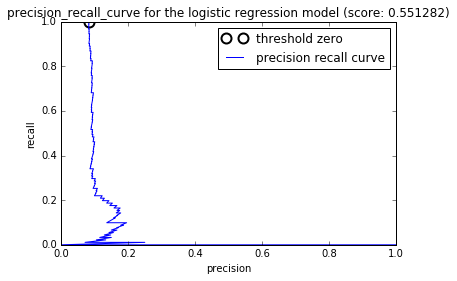

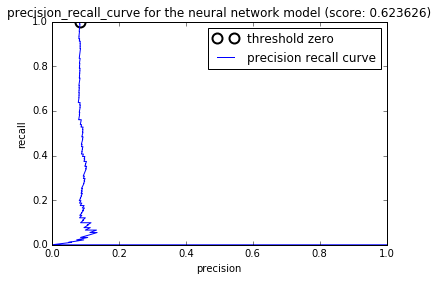

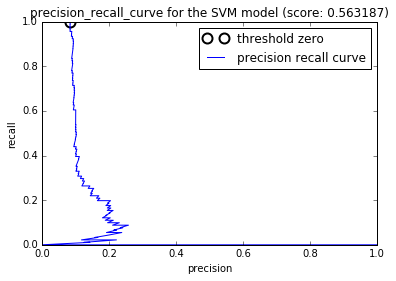

In [43]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

names = ["logistic regression", "neural network", "SVM"]

o_logreg = LogisticRegression(C=10).fit(X_train_new, y_train_new)
o_mlp = MLPClassifier(hidden_layer_sizes=[250, 250, 250, 250], max_iter=1000, random_state=0).fit(X_train_new, y_train_new)
o_svm = SVC(kernel='sigmoid', C=1000, probability=True).fit(X_train_new, y_train_new)


for i, model in enumerate([o_logreg, o_mlp, o_svm]):
    precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

    close_zero = np.argmin(np.abs(thresholds))
    plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
             label="threshold zero", fillstyle="none", c='k', mew=2)
    plt.plot(precision, recall, label="precision recall curve")
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.title("precision_recall_curve for the %s model (score: %f)" % (names[i], model.score(X_test, y_test)));
    plt.legend(loc="best")
    plt.show()

# your code goes here

For this case, the neural network has by far the highest score. However, the neural network implementation would be the least suitable for this case, since due to the high amount of features, the complexity of the network exceeds a point where accurate predictions can be made with the current training and test sets. The SVM implementation, while is has a much faster execution time, also has a acceptable score. However, through this assignment we've learned that the choosing a model is based on your own preference. 